In [270]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import  matplotlib.pyplot as plt

%matplotlib inline

In [381]:
np.random.seed(1)
N = 10000
states = ["s1", "s2", "s3", "s4", "s5"]
state_electorial_college_votes = Series(np.array([5, 10, 15, 20, 25]), index=states)
local_vote_predictions = Series(np.array([0.53, 0.54, 0.56, 0.52, 0.46]), index=states)
local_margin_of_error = Series(np.array([0.07, 0.05, 0.04, 0.02, 0.04]), index=states)
national_margin_of_error = 0.03

In [316]:
local_error_sim = DataFrame(np.random.randn(N, len(states)), columns=states).multiply(local_margin_of_error)
national_error_sim = Series(np.random.randn(N) * national_margin_of_error)

$$
LocalError = \sqrt{TotalError^{2} + NationalError^{2}}
$$

$$
TotalError = \sqrt{LocalError^{2} + NationalError^{2}}
$$

In [317]:
# total_error_signs = DataFrame(np.random.choice([-1, 1], size=local_error_sim.shape), columns=states)
# total_error_sim = (local_error_sim**2).add(national_error_sim**2, axis='rows') * total_error_signs
total_error_sim = local_error_sim.add(national_error_sim, axis='rows')

In [318]:
simulated_vote_predictions = total_error_sim.add(local_vote_predictions)

In [319]:
simulated_vote_predictions.corr()

,s1,s2,s3,s4,s5
s1,1.000000,0.199057,0.219443,0.320138,0.239901
s2,0.199057,1.000000,0.307852,0.431101,0.298213
s3,0.219443,0.307852,1.000000,0.507409,0.356670
s4,0.320138,0.431101,0.507409,1.000000,0.486735
s5,0.239901,0.298213,0.356670,0.486735,1.000000


In [355]:
bins = np.arange(0, 1, 0.01)
histograms = {s: np.histogram(simulated_vote_predictions[s], bins=bins, density=True)[0] for s in states}

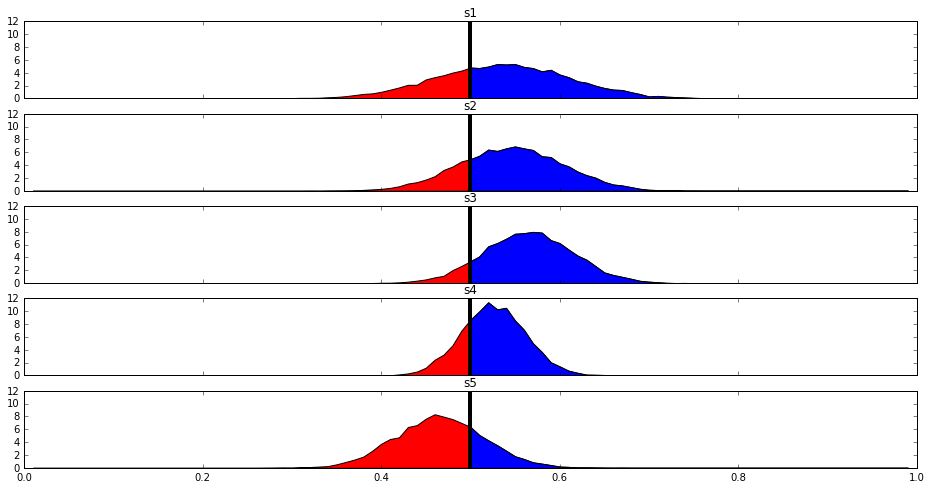

In [359]:
fig, axes = plt.subplots(len(states), 1, sharex=True, figsize=(16,  8))

for state, ax in zip(states, axes):
    ax.fill_between(bins[1:], 0, histograms[state], facecolor='red')
    ax.fill_between(bins[50:], 0, histograms[state][49:], facecolor='blue')
    ax.set_title(state)
    ax.plot([0.5, 0.5], [0, 12], color='k', linewidth=4)    

In [376]:
wins = DataFrame([sum(simulated_vote_predictions[s] > 0.5) / float(N) for s in states], index=states, columns=["DemWinPct"])
wins['RepWinPct'] = 1 - wins['DemWinPct']
wins

,DemWinPct,RepWinPct
s1,0.6553,0.3447
s2,0.7513,0.2487
s3,0.8845,0.1155
s4,0.7153,0.2847
s5,0.2118,0.7882


In [407]:
dem_simulated_electorial_college = (simulated_vote_predictions > 0.5).multiply(state_electorial_college_votes)
rep_simulated_electorial_college = (simulated_vote_predictions < 0.5).multiply(state_electorial_college_votes)
dem_simulated_electorial_college['total'] = dem_simulated_electorial_college.sum(axis=1)
rep_simulated_electorial_college['total'] = rep_simulated_electorial_college.sum(axis=1)

In [408]:
dem_simulated_electorial_college.iloc[:10,]

,s1,s2,s3,s4,s5,total
0,5,0,15,0,0,20
1,0,10,15,20,0,45
2,5,0,15,20,25,65
3,0,0,0,0,0,0
4,0,10,15,20,0,45
5,0,10,15,20,0,45
6,0,10,15,0,0,25
7,5,10,15,20,25,75
8,5,10,15,20,0,50
9,0,10,15,20,0,45


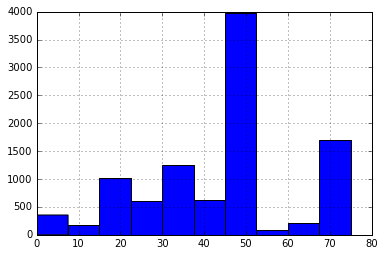

In [393]:
dem_electorial_college_votes.hist()

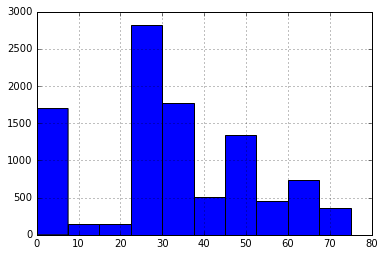

In [395]:
rep_electorial_college_votes.hist()

In [409]:
# DEM chance of winning
sum(dem_simulated_electorial_college['total'] > rep_simulated_electorial_college['total']) / float(N)

0.65849999999999997